# About `tonyfast`

I am in a state of transition at the moment.  The best step forward starts with looking back.  In this document, I am going to evaluated my personal progress in programming based on my gists.

I have been using gists for quite a while.  I like the reliability and flexibility of static documents.  It is possible to observe many facets of the work through idea, design, code and view.  

In [71]:
    __me__ = 'tonyfast' # my github user name, replace this value with your own to view this work.

`RequestIndex` is a work-in-progress that simplies accessing urls using `pandas` indices.

In [2]:
    from wip.clsindex import RequestIndex, ResponseIndex

## High level repository information

In [3]:
    __info__ = ('https://api.github.com/users' / RequestIndex(__me__)).get()

## Gists

In [19]:
    from matplotlib.pyplot import *; from pandas import *
    i = 20
    __gists__ = concat((RequestIndex([__info__.json()[0]['gists_url'].replace('{/gist_id}', '?page=')]*i) + map(str, map(lambda x: x+1, range(i)))
            ).get().json().apply(DataFrame).values).set_index('id')
    
    # Get the time formats correct
    for _ in [_ for _ in __gists__.columns if _.endswith('_at')]:  __gists__[_] = to_datetime(__gists__[_])

    "There are {} gists containing {} files.".format(len(__gists__), __gists__.files.apply(len).sum())

'There are 400 gists containing 586 files.'

### A look at the files

In [20]:
    __files__ = concat(dict(
        Series(__gists__.files.apply(dict.values).apply(list).apply(DataFrame).values, index=__gists__.index).iteritems()
    )).pipe(lambda df: concat([
        df.reset_index(drop=True), __gists__.loc[df.index.get_level_values(0).tolist()].reset_index(drop=True)
    ], axis=1).set_index(df.index))

### and the file types.

In [21]:
    __periods__ = __files__.set_index('created_at').language.groupby(TimeGrouper('6M')).value_counts().unstack(1)
    __periods__.sum().to_frame('files').sort_values('files', ascending=False).T

language,Jupyter Notebook,Markdown,HTML,Python,YAML,JavaScript,Matlab,JSON,Text,CSV,CoffeeScript,CSS,SVG,TypeScript,Limbo,Smarty,XML
files,242.0,68.0,68.0,37.0,29.0,25.0,25.0,15.0,10.0,8.0,7.0,4.0,3.0,2.0,1.0,1.0,1.0


#### over time

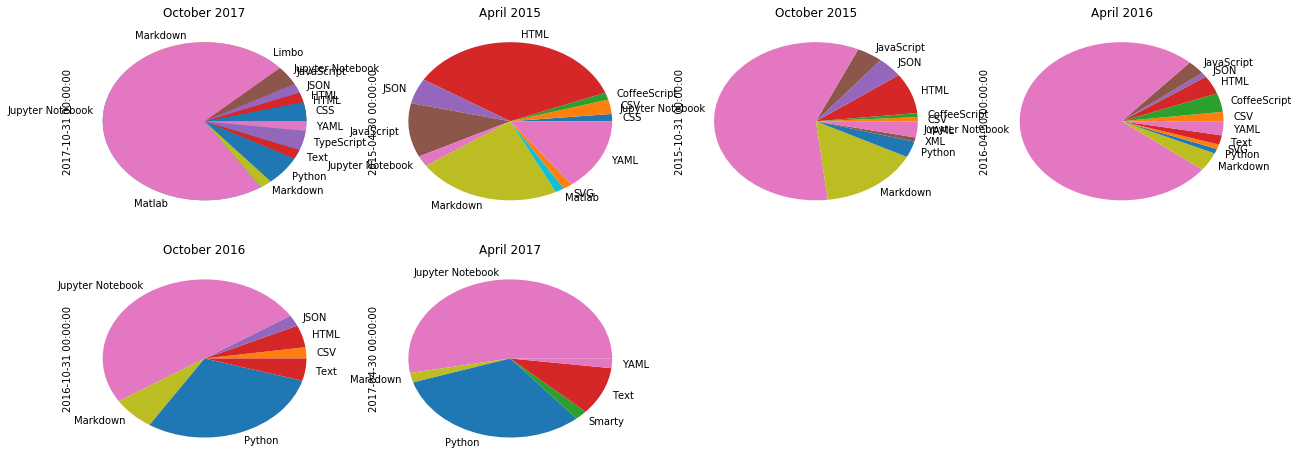

In [27]:
    %matplotlib inline

    figure(figsize=(len(__periods__)*3, 4*2)) and [
        s.plot.pie(ax=subplot(2, 4, i%6+1), title=title.strftime('%B %Y')) for i, (title, s) in enumerate(__periods__.sort_index().iterrows())];

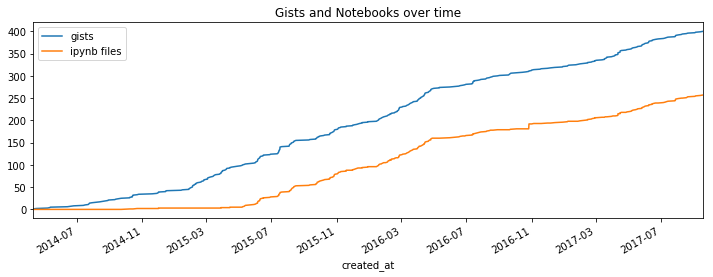

In [70]:
    from toolz.curried import *; from pathlib import Path
    Series(1, __gists__.set_index('created_at').index).sort_index().cumsum().rename('gists').plot(legend=True, figsize=(12, 4))
    __gists__.set_index('created_at').files.rename('ipynb files').apply(map(compose(operator.attrgetter('suffix'), Path))).apply(filter(operator.eq('.ipynb'))).apply(count).sort_index().cumsum().plot(ax=gca(), legend=True)
    gca().set_title("Gists and Notebooks over time");

In [73]:
from wip.clsindex import PathIndex

---

To do:

[<del>download gists</del>](https://tonyfast.github.io/clog/clog/2017-09-21-Automate-Gist-Collection-With-Doit.html) and analyze imports.